In [1]:
import numpy as np

## Primera fila son coordenadas X
## Segunda fila son coordenadas Y
## Cada columna es el punto.
puntos = np.array([[1, 2, 4, 5], [1, 1, 3, 4]])
puntos

c_1 = np.array([1, 1])
c_2 = np.array([2, 1])
puntos

array([[1, 2, 4, 5],
       [1, 1, 3, 4]])

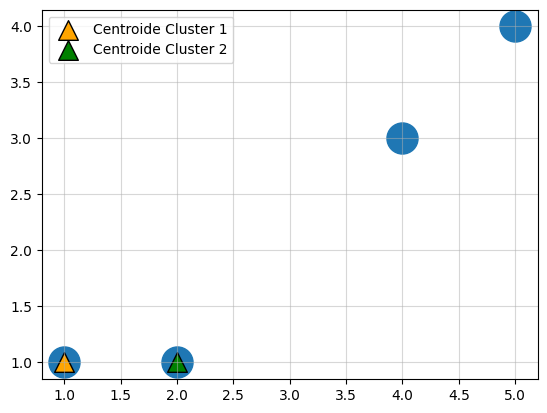

In [2]:
import matplotlib.pyplot as plt


def plot_clusters(puntos, c_1, c_2, c=None):
    plt.scatter(puntos[0], puntos[1], s=500, c=c)
    plt.scatter(
        c_1[0],
        c_1[1],
        marker="^",
        label="Centroide Cluster 1",
        edgecolors="k",
        s=200,
        color="orange",
    )
    plt.scatter(
        c_2[0],
        c_2[1],
        marker="^",
        label="Centroide Cluster 2",
        edgecolors="k",
        s=200,
        c="green",
    )
    plt.grid(alpha=0.5)
    plt.legend()


plot_clusters(puntos, c_1, c_2)

In [3]:
def distancia(p0, p1):
    x0 = p0[0]
    x1 = p1[0]
    y0 = p0[1]
    y1 = p1[1]
    return np.sqrt((x1 - x0) ** 2 + (y1 - y0) ** 2)

In [4]:
def calculate_distances(puntos, c_1, c_2):

    distancia_mat = np.zeros((2, 4))
    distancia_mat

    for i in range(4):
        p = puntos[:, i]
        distancia_mat[0, i] = distancia(p, c_1)
        distancia_mat[1, i] = distancia(p, c_2)

    return distancia_mat


distancia_mat = calculate_distances(puntos, c_1, c_2)
distancia_mat

array([[0.        , 1.        , 3.60555128, 5.        ],
       [1.        , 0.        , 2.82842712, 4.24264069]])

In [5]:
def calculate_clusters(distancia_mat):
    min_distancia_mat = np.min(distancia_mat, axis=0)

    clusters = distancia_mat == min_distancia_mat
    return clusters


clusters = calculate_clusters(distancia_mat)
clusters.astype("int64")

## Solo el punto 1 pertenece al cluster 1, todo el resto al cluster 2

array([[1, 0, 0, 0],
       [0, 1, 1, 1]])

In [6]:
def calculate_centroids(clusters):
    c_1 = puntos[:, clusters[0]].mean(axis=1)
    c_2 = puntos[:, clusters[1]].mean(axis=1)

    return c_1, c_2


c_1, c_2 = calculate_centroids(clusters)
c_1, c_2

(array([1., 1.]), array([3.66666667, 2.66666667]))

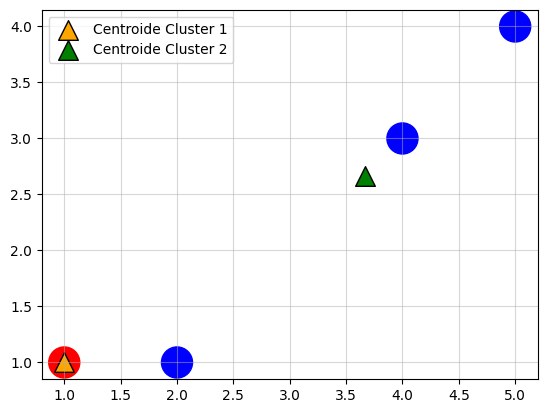

In [7]:
plot_clusters(puntos, c_1, c_2, c=["red", "blue", "blue", "blue"])

In [8]:
distancia_mat = calculate_distances(puntos, c_1, c_2)
clusters = calculate_clusters(distancia_mat)
c_1, c_2 = calculate_centroids(clusters)
clusters

array([[ True,  True, False, False],
       [False, False,  True,  True]])

In [9]:
c_1, c_2

(array([1.5, 1. ]), array([4.5, 3.5]))

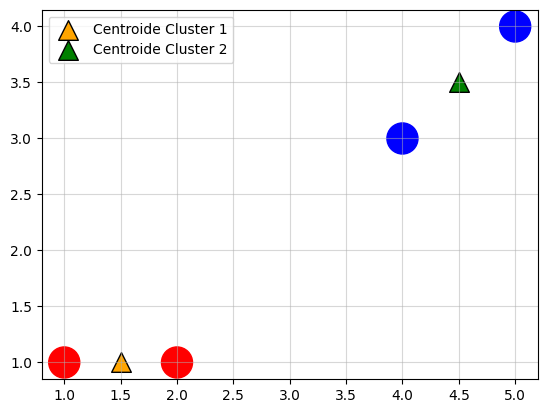

In [10]:
plot_clusters(puntos, c_1, c_2, c=["red", "red", "blue", "blue"])